In [4]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Disable all warnings
warnings.filterwarnings ('ignore')

In [18]:
df = pd.read_csv ('./data/data.csv')

In [19]:
# Determine the percentage of restaurants that offer table booking
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
print('Percentage of restaurants that offer table booking:\n', table_booking_percentage)


Percentage of restaurants that offer table booking:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


In [20]:

# Determine the percentage of restaurants that offer online delivery
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100
print('Percentage of restaurants that offer online delivery:\n', online_delivery_percentage)


Percentage of restaurants that offer online delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [21]:

# Compare the average ratings of restaurants with table booking and those without
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print('Average rating of restaurants with/without table booking:\n', avg_rating_table_booking)


Average rating of restaurants with/without table booking:
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


In [22]:

# Analyse the availability of online delivery among restaurants with different price ranges
online_delivery_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print('Online delivery availability by price range:\n', online_delivery_price_range)


Online delivery availability by price range:
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


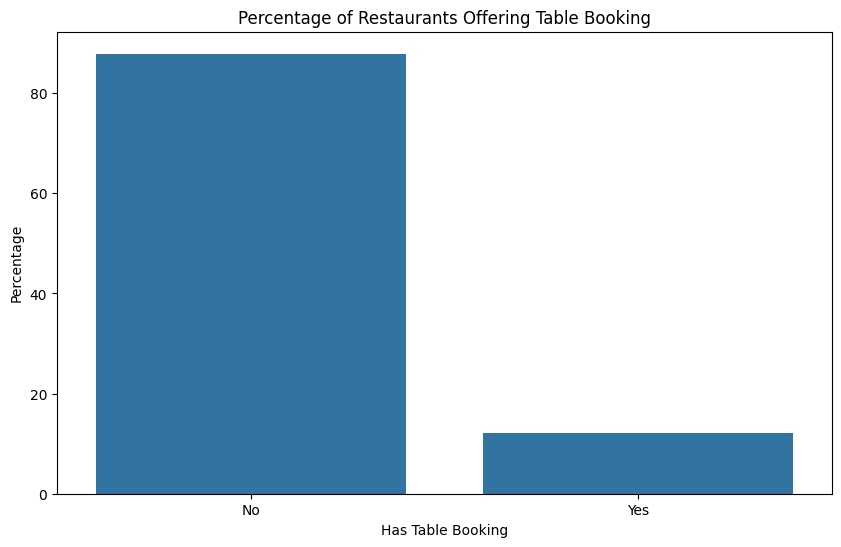

In [23]:

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=table_booking_percentage.index, y=table_booking_percentage.values)
plt.title('Percentage of Restaurants Offering Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Percentage')
plt.show()


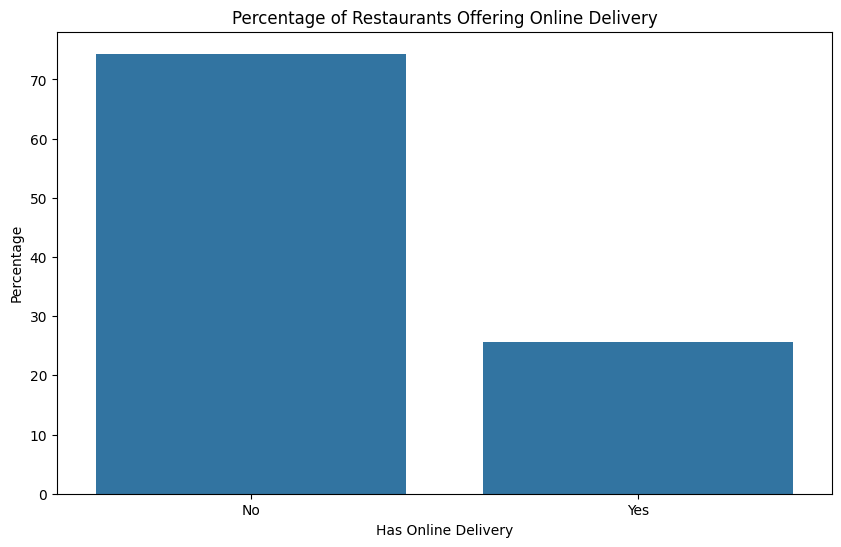

In [24]:

plt.figure(figsize=(10, 6))
sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values)
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Percentage')
plt.show()


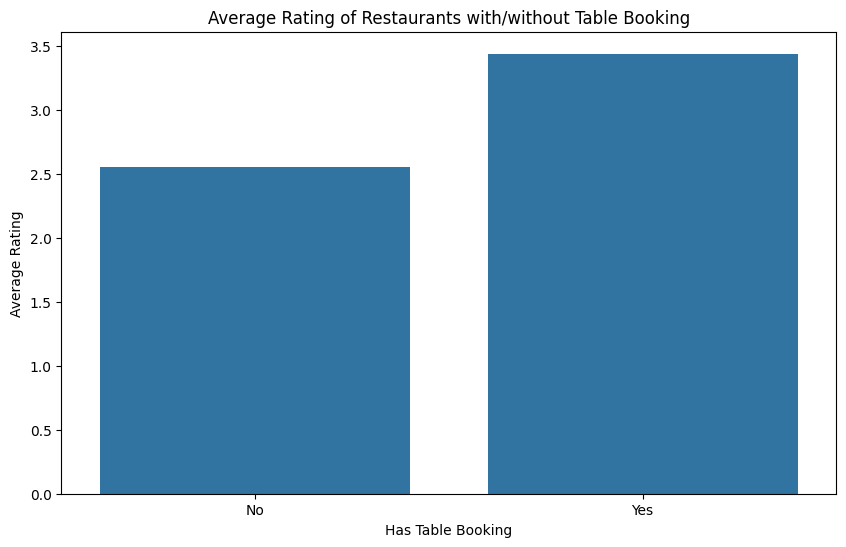

In [25]:

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values)
plt.title('Average Rating of Restaurants with/without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.show()


<Figure size 1000x600 with 0 Axes>

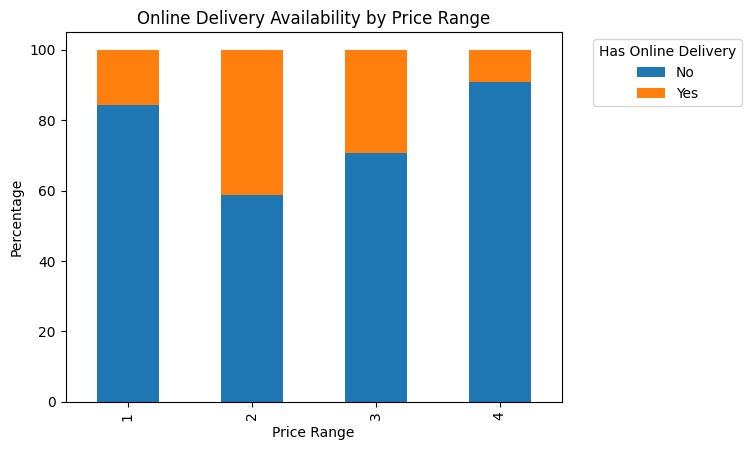

In [26]:

plt.figure(figsize=(10, 6))
online_delivery_price_range.plot(kind='bar', stacked=True)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Has Online Delivery', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
